A proveniência dos dados é importante para agregar metadados sobre a origem, sua obtenção e mais informações sobre os dados, o que enriquece a pesquisa científica e a identificação da autoria [@buneman2007provenance]. Para adicionar proveniência ao trabalho, utilizamos a biblioteca `prov`, que é a alternativa em Python para o modelo fornecido em [@missier2013w3c]. Sua instalação é feita como na célula abaixo.

In [1]:
pip install prov

     |████████████████████████████████| 421 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 500 kB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 41 kB 2.0 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Tendo a biblioteca instalada, é possível importar o necessário. Além disso, nessa primeira etapa, é inicializado o documento de proveniência: 

In [6]:
from prov.model import ProvDocument
d = ProvDocument()

Para obter o grafo de proveniência como resultado, é necessário definir os agentes, as entidades e atividades, tal qual descrito abaixo:

In [26]:
graph = 'grafo_de_proveniencia'
entity   = 'Microdados_Censo_da_Educação_Superior'
agent    = 'Alexandre-Lenise-Lucas-Luciane'
activity_1 = 'Aquisição_dos_Dados'
activity_2 = 'Tratamento_dos_dados'
activity_3 = 'Análise_e_Investigações'

Tendo isso, passamos para a construção do grafo de acordo com o que foi usado na pesquisa, definindo os prefixos, adicionando agentes, entidades e atividades, configurando geradores e fazendo as devidas atribuições. 

In [9]:
import datetime

# Declaração dos namespaces para os prefixos do trabalho
d.add_namespace('inep', 'https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados')
d.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/#term_Agent')
d.add_namespace('ufrj', 'http://www.ufrj.br/ppgi/')

# Adição da entidade
entity = "inep:" + entity
e1 = d.entity(entity)

# Adição do agente
agent = "foaf:" + agent
d.agent(agent)

# Atribuição da execução do experimento ao agente
d.wasAttributedTo(e1, agent)

# Adição das atividades
activity_1 = "ufrj:" + activity_1
d.activity(activity_1)
activity_2 = "ufrj:" + activity_2
d.activity(activity_2)
activity_3 = "ufrj:" + activity_3
d.activity(activity_3)

# Configurando geradores
d.wasGeneratedBy( entity, activity_1)
d.wasGeneratedBy( entity, activity_2)
d.wasGeneratedBy( entity, activity_3)

# Adição de papel ao agente e um timestamp
d.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': 'grupo_5', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

d.entity(entity, {'prov:location':'https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados'})


<ProvEntity: inep:Microdados_Censo_da_Educação_Superior>

In [21]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


Para visualização gráfica e geração do output em XML, foram necessárias as instalações das bibliotecas acima, além do seguinte comando no terminal(válido para mac os):  
`brew install gprof2dot`  
Ainda é possível essa preparação para visualização gráfica usando o seguinte, conforme disponível no [material dos professores Sérgio Serra e Jorge Zavaleta](https://github.com/zavaleta/Fundamentos_DS/blob/main/FCD_M1_4_Provenance.ipynb):  
`conda install -c anaconda pydot`  
`conda install -c anaconda graphviz`  
Agora, com toda a preparação, é possível gerar o grafo e também um meio de visualizar.

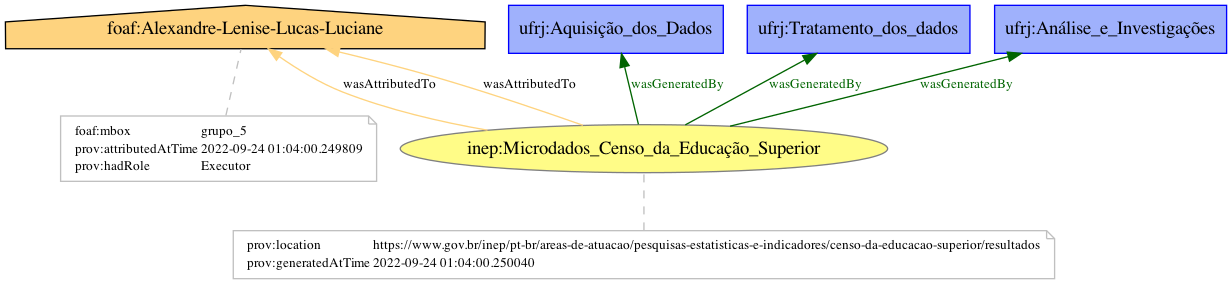

In [31]:
# Criando pasta para armazenar os outputs
import os
provenance_output_dir = "../provenance_data/"
os.makedirs(os.path.dirname(provenance_output_dir), exist_ok=True)

from prov.dot import prov_to_dot
# Generação do Grafo de Proveniência
dot = prov_to_dot(d)
graph_png = graph + ".png"
dot.write_png(provenance_output_dir + graph_png)

# Generação do Output em XML
output_name = provenance_output_dir + "microdados_censo_educacao_superior.xml"
d.serialize(output_name, format='xml')

# Visualização do Grafo de Proveniência
from IPython.display import Image
Image(provenance_output_dir + graph_png)